In [ ]:
#Data Wrangling II
#Create an “Academic performance” dataset of students and perform the following operations using

#1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
#inconsistencies, use any of the suitable techniques to deal with them.
#2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
#techniques to deal with them.
#3. Apply data transformations on at least one of the variables. The purpose of this
#transformation should be one of the following reasons: to change the scale for better
#understanding of the variable, to convert a non-linear relation into a linear one, or to
#decrease the skewness and convert the distribution into a normal distribution

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
data={
    "Name":['Tabasum','sangeeta','ayesha','zikra'],
    "Age":[-22,18,19,np.nan],
    "Branch":['IT','CS','IT','CS'],
    "college-id":[23121,23122,23144,124234],
    "Grade":['A','B','A+','O']
}

In [4]:
df=pd.DataFrame(data)

In [5]:
df

,Name,Age,Branch,college-id,Grade
0,Tabasum,-22.0,IT,23121,A
1,sangeeta,18.0,CS,23122,B
2,ayesha,19.0,IT,23144,A+
3,zikra,NaN,CS,124234,O


In [6]:
df.isnull()

,Name,Age,Branch,college-id,Grade
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,True,False,False,False


In [7]:
df.to_csv('Tabu.csv' , index=False)

In [8]:
df=pd.read_csv("Tabu.csv")

In [9]:
df

,Name,Age,Branch,college-id,Grade
0,Tabasum,-22.0,IT,23121,A
1,sangeeta,18.0,CS,23122,B
2,ayesha,19.0,IT,23144,A+
3,zikra,NaN,CS,124234,O


In [10]:
df['Adress']=['Pune','Mumbai','Nanded','Nasik']

In [11]:
df.head()


,Name,Age,Branch,college-id,Grade,Adress
0,Tabasum,-22.0,IT,23121,A,Pune
1,sangeeta,18.0,CS,23122,B,Mumbai
2,ayesha,19.0,IT,23144,A+,Nanded
3,zikra,NaN,CS,124234,O,Nasik


In [13]:
df['Age'].fillna(22,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_5896\3997705861.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(22,inplace=True)


In [14]:
df

,Name,Age,Branch,college-id,Grade,Adress
0,Tabasum,-22.0,IT,23121,A,Pune
1,sangeeta,18.0,CS,23122,B,Mumbai
2,ayesha,19.0,IT,23144,A+,Nanded
3,zikra,22.0,CS,124234,O,Nasik


In [15]:
df.isnull()

,Name,Age,Branch,college-id,Grade,Adress
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False


In [16]:
mean_age=df['Age'].mean()

In [17]:
df['Age']=df['Age'].apply(lambda x:mean_age if x<0 else x)

In [18]:
print(df)

       Name    Age Branch  college-id Grade  Adress
0   Tabasum   9.25     IT       23121     A    Pune
1  sangeeta  18.00     CS       23122     B  Mumbai
2    ayesha  19.00     IT       23144    A+  Nanded
3     zikra  22.00     CS      124234     O   Nasik


In [19]:
A=df['Age']

In [20]:
Q1=np.percentile(A,25)

In [21]:
Q3=np.percentile(A,75)

In [22]:
IQR=Q3-Q1

In [23]:
L_B=Q1-1.5*IQR
U_B=Q3+1.5*IQR

In [24]:
print(f"Lower Bound:{L_B}")
print(f"Upper Bound:{U_B}")

Lower Bound:9.90625
Upper Bound:25.65625


In [25]:
outliers = df[(df['Age']<L_B)|(df['Age']>U_B)]
print("Outliers in the 'Age' column:")
print(outliers)

Outliers in the 'Age' column:
      Name   Age Branch  college-id Grade Adress
0  Tabasum  9.25     IT       23121     A   Pune


In [26]:
mean_age=df['Age'].mean()
df['Age']=df['Age'].apply(lambda x:mean_age if x< L_B or x>U_B else x)
print("\n Updated Data(Outliers Replaced With Mean):")


 Updated Data(Outliers Replaced With Mean):


In [28]:
print(df)

       Name      Age Branch  college-id Grade  Adress
0   Tabasum  17.0625     IT       23121     A    Pune
1  sangeeta  18.0000     CS       23122     B  Mumbai
2    ayesha  19.0000     IT       23144    A+  Nanded
3     zikra  22.0000     CS      124234     O   Nasik


In [29]:
import seaborn as sns

In [30]:
import matplotlib.pyplot as plt

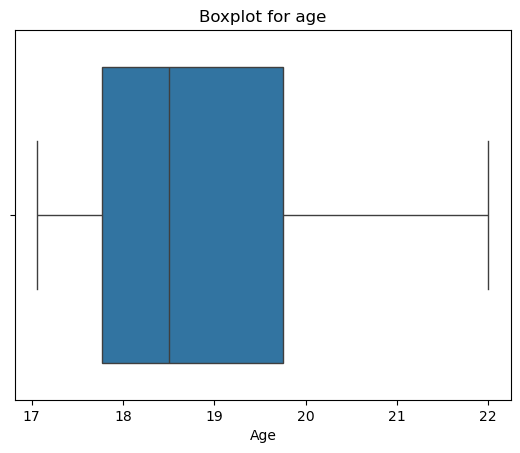

In [31]:
sns.boxplot(x=df['Age'])
plt.title("Boxplot for age")
plt.show()

In [32]:
from sklearn.preprocessing import MinMaxScaler 


In [37]:
scaler=MinMaxScaler()

In [38]:
df['ScaleAge']=scaler.fit_transform(df[['Age']])
print(df['ScaleAge'])

0    0.000000
1    0.189873
2    0.392405
3    1.000000
Name: ScaleAge, dtype: float64


<Axes: xlabel='ScaleAge', ylabel='Count'>

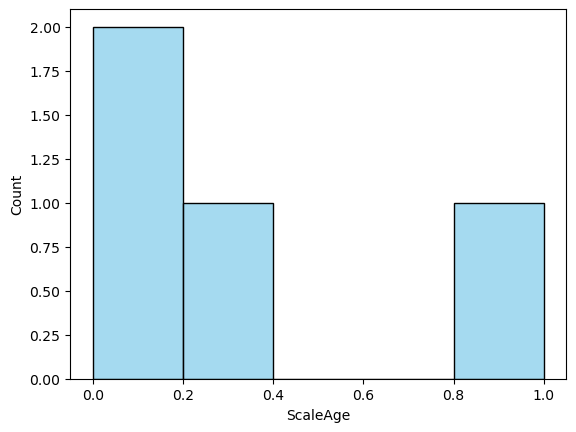

In [39]:
sns.histplot(df['ScaleAge'],bins=5,kde=False, color='Skyblue')

In [40]:
from sklearn.preprocessing import PowerTransformer

In [41]:
Skewed_data = PowerTransformer()

In [42]:
df['Age']=Skewed_data.fit_transform(df[['Age']])

In [43]:
df['Age']

0   -1.290948
1   -0.419385
2    0.265697
3    1.444636
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

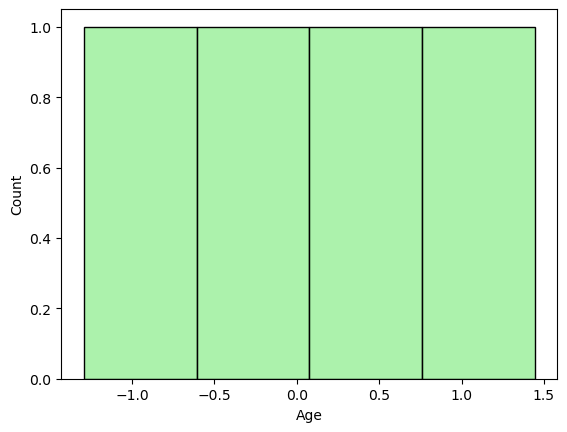

In [48]:
sns.histplot(df['Age'], bins=4,kde=False, color='lightgreen')

In [ ]:
##Handle Missing Values:
#🔍 Used to clean incomplete data by checking isnull() — missing values can affect model accuracy.
#✅ Fix them with fillna() (e.g., mean, median) or dropna() to remove rows/columns.

#Remove Outliers:
#📊 Outliers are extreme values that can distort your analysis or model results.
#✅ Detect with boxplots or IQR method, and handle by removing or capping (limiting their impact).

#Apply Transformations:
#🔄 Transformations help to normalize skewed data or linearize relationships for better modeling.
#✅ Use methods like log(), sqrt(), or standard scaling to make the data more suitable for analysis.

